### Kod för att testa var Re börjar under 1, flockimmunitet uppnås.
### Kan tas bort vid inlämning!!

In [1]:
import importlib
import Agenter
import Modell

importlib.reload(Modell)
importlib.reload(Agenter)

import matplotlib.pyplot as plt
import numpy as np

In [2]:
#Modellparametrar
N = 100000
width = 140
height = 70
initial_infected = 100
mortality_rate = 0.0021
timesteps = 100
num_runs = 5 #antal körningar 

In [3]:
#Ny simulering med 93,4% vaccinationsgrad

vaccination_rate_0 = 0.934


S_runs_0 = [] 
I_runs_0 = [] 
R_runs_0 = [] 
D_runs_0 = [] 
Re_runs_0 = [] 
R0_runs_0 = [] 

new_inf_runs_0 = []
total_new_inf_runs_0 = []

for run in range(num_runs):
 
    model_0 = Modell.SIRModel(N, width, height, initial_infected, vaccination_rate_0, mortality_rate)

    for t in range(timesteps):
        model_0.step()

    model_df_0 = model_0.datacollector.get_model_vars_dataframe()
    
    new_inf_runs_0.append(model_df_0["New Infected"].values)
    total_new_inf_runs_0.append(model_df_0["Total New Infected"].values)
    Re_runs_0.append(model_df_0["Re"].values) 
    R0_runs_0.append(model_df_0["R0"].values) 

    S_runs_0.append(model_df_0["Susceptible"].values)
    I_runs_0.append(model_df_0["Infected"].values)
    R_runs_0.append(model_df_0["Resistant"].values)
    D_runs_0.append(model_df_0["Dead"].values)

S_arr_0 = np.array(S_runs_0)
I_arr_0 = np.array(I_runs_0)
R_arr_0 = np.array(R_runs_0)
D_arr_0 = np.array(D_runs_0)
Re_arr_0 = np.array(Re_runs_0) 
R0_arr_0 = np.array(R0_runs_0) 
new_inf_runs_arr_0 = np.array(new_inf_runs_0)
total_new_inf_runs_arr_0 = np.array(total_new_inf_runs_0)

S_mean_0, S_std_0 = np.mean(S_arr_0, axis=0), np.std(S_arr_0, axis=0)
I_mean_0, I_std_0 = np.mean(I_arr_0, axis=0), np.std(I_arr_0, axis=0)
R_mean_0, R_std_0 = np.mean(R_arr_0, axis=0), np.std(R_arr_0, axis=0)
D_mean_0, D_std_0 = np.mean(D_arr_0, axis=0), np.std(D_arr_0, axis=0)
Re_mean_0, Re_std_0 = np.mean(Re_arr_0, axis=0), np.std(Re_arr_0, axis=0)
R0_mean_0, R0_std_0 = np.mean(R0_arr_0, axis=0), np.std(R0_arr_0, axis=0)

mean_new_0 = new_inf_runs_arr_0.mean(axis=0)
std_new_0 = new_inf_runs_arr_0.std(axis=0)
mean_total_0 = total_new_inf_runs_arr_0.mean(axis=0)
std_total_0 = total_new_inf_runs_arr_0.std(axis=0)

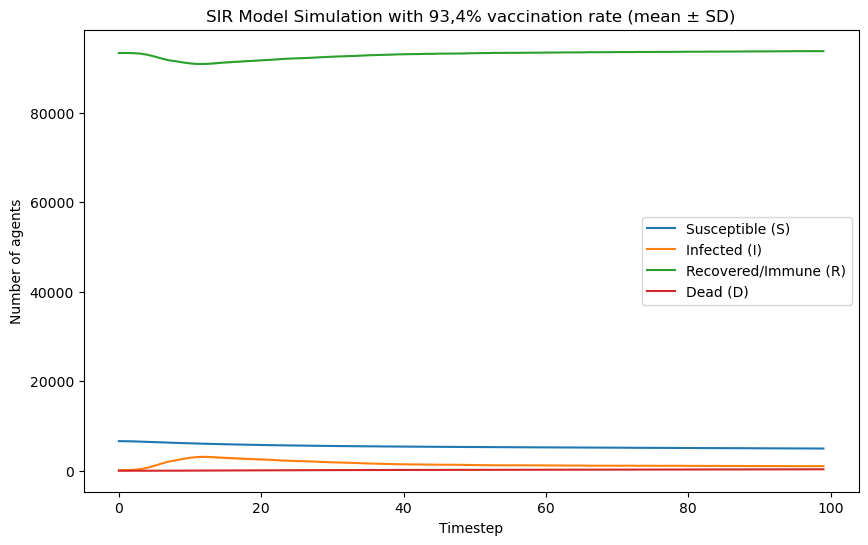

In [4]:
timesteps_range = np.arange(timesteps)

plt.figure(figsize=(10,6))
plt.plot(S_mean_0, label="Susceptible (S)")
plt.fill_between(timesteps_range, S_mean_0 - S_std_0, S_mean_0 + S_std_0, alpha=0.2)

plt.plot(I_mean_0, label="Infected (I)")
plt.fill_between(timesteps_range, I_mean_0 - I_std_0, I_mean_0 + I_std_0, alpha=0.2)

plt.plot(R_mean_0, label="Recovered/Immune (R)")
plt.fill_between(timesteps_range, R_mean_0 - R_std_0, R_mean_0 + R_std_0, alpha=0.2)

plt.plot(D_mean_0, label="Dead (D)")
plt.fill_between(timesteps_range, D_mean_0 - D_std_0, D_mean_0 + D_std_0, alpha=0.2)

plt.xlabel("Timestep")
plt.ylabel("Number of agents")
plt.title("SIR Model Simulation with 93,4% vaccination rate (mean ± SD)")
plt.legend()
plt.show()


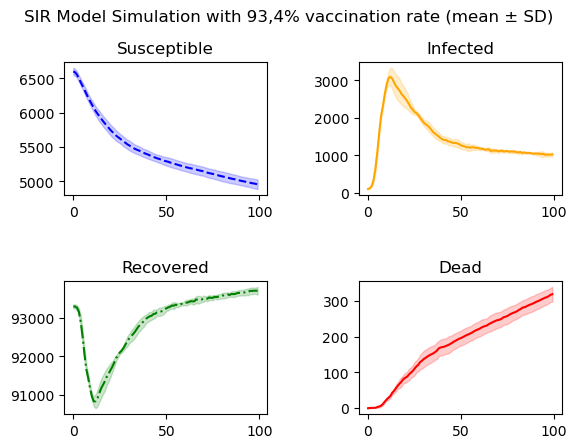

In [5]:
fig, axs = plt.subplots(2, 2)
axs[0, 0].plot(S_mean_0,'b--', label = "Susceptible")
axs[0, 0].fill_between(timesteps_range, S_mean_0 - S_std_0, S_mean_0 + S_std_0, color = 'b', alpha=0.2)
axs[0, 0].set_title('Susceptible')

axs[0, 1].plot(I_mean_0,color='orange', label = "Infected")
axs[0, 1].fill_between(timesteps_range, I_mean_0 - I_std_0, I_mean_0 + I_std_0, color ='orange', alpha=0.2)
axs[0, 1].set_title('Infected')

axs[1, 0].plot(R_mean_0,'g-.', label = "Recovered")
axs[1, 0].fill_between(timesteps_range, R_mean_0 - R_std_0, R_mean_0 + R_std_0, color ='g', alpha=0.2)
axs[1, 0].set_title('Recovered')

axs[1, 1].plot(D_mean_0, color ='r', label = "Dead")
axs[1, 1].fill_between(timesteps_range, D_mean_0 - D_std_0, D_mean_0 + D_std_0, color ='r', alpha=0.2)
axs[1, 1].set_title('Dead')

plt.tight_layout(pad = 3.0)
fig.suptitle("SIR Model Simulation with 93,4% vaccination rate (mean ± SD)")
plt.show()

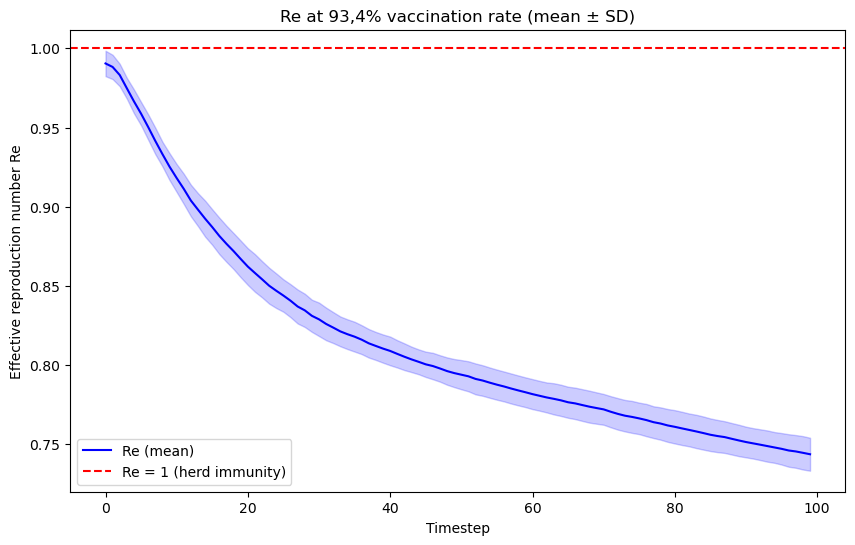

In [6]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, Re_mean_0, color='blue', label='Re (mean)')
plt.fill_between(timesteps_range, Re_mean_0 - Re_std_0, Re_mean_0 + Re_std_0, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='Re = 1 (herd immunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number Re")
plt.title(f"Re at 93,4% vaccination rate (mean ± SD)")
plt.legend()
plt.show()

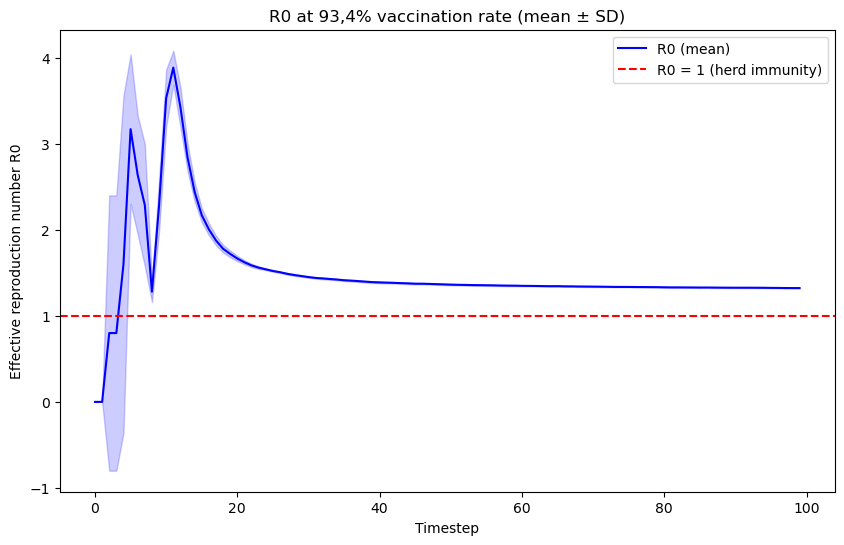

In [7]:
plt.figure(figsize=(10,6))
plt.plot(timesteps_range, R0_mean_0, color='blue', label='R0 (mean)')
plt.fill_between(timesteps_range, R0_mean_0 - R0_std_0, R0_mean_0 + R0_std_0, color='blue', alpha=0.2)
plt.axhline(1, color='red', linestyle='--', label='R0 = 1 (herd immunity)')

plt.xlabel("Timestep")
plt.ylabel("Effective reproduction number R0")
plt.title(f"R0 at 93,4% vaccination rate (mean ± SD)")
plt.legend()
plt.show()

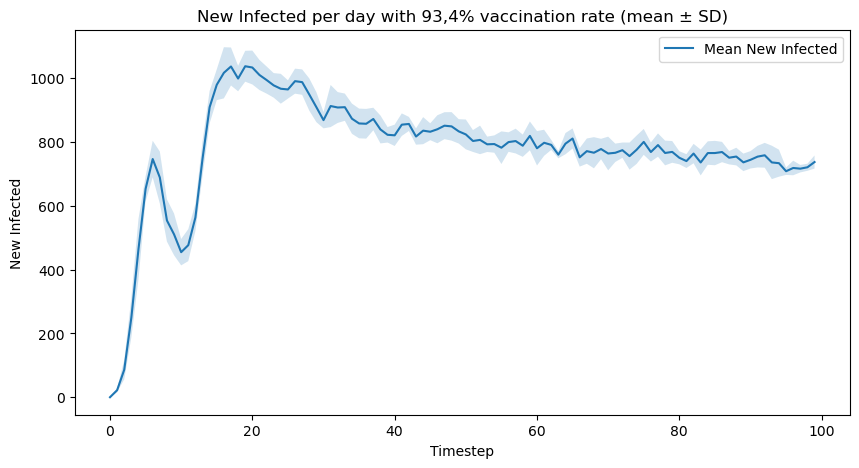

In [8]:
plt.figure(figsize=(10,5))
plt.plot(mean_new_0, label="Mean New Infected")
plt.fill_between(range(timesteps), mean_new_0 - std_new_0, mean_new_0 + std_new_0, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("New Infected")
plt.title("New Infected per day with 93,4% vaccination rate (mean ± SD)")
plt.legend()
plt.show()

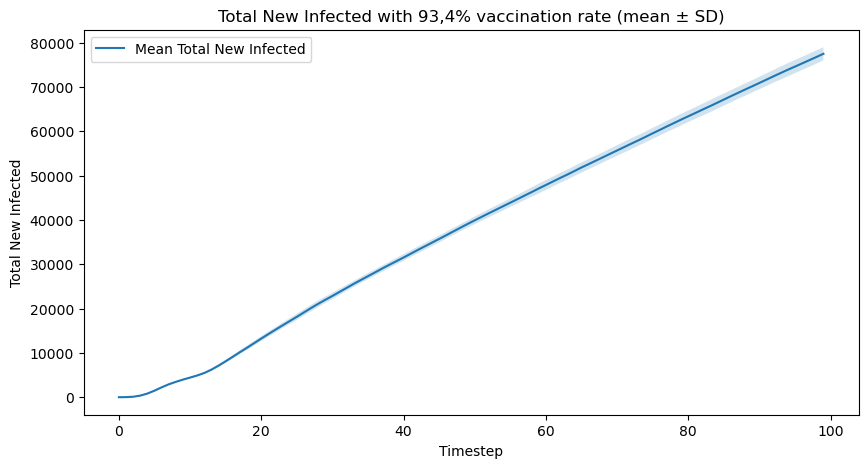

In [9]:
plt.figure(figsize=(10,5))
plt.plot(mean_total_0, label="Mean Total New Infected")
plt.fill_between(range(timesteps), mean_total_0 - std_total_0, mean_total_0 + std_total_0, alpha=0.2)
plt.xlabel("Timestep")
plt.ylabel("Total New Infected")
plt.title("Total New Infected with 93,4% vaccination rate (mean ± SD)")
plt.legend()
plt.show()